# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from itertools import cycle, islice

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [3]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [4]:
sinasc_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [19]:
sinasc_raw.select_dtypes(exclude=['object']).head() #identificarcomo são algumas variáveis numéricas que podem ser usadas

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,...,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,NaN,0.0,0.0,110001,...,1,1,1,0,5,1,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,2,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,513205.0,2.0,0.0,110001,...,1,1,7,1,5,3,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,231205.0,0.0,0.0,110037,...,1,1,2,0,4,4,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,999992.0,1.0,0.0,110001,...,1,1,5,1,5,5,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [98]:
sinasc1 = sinasc_raw[['munResLat','QTDFILVIVO','QTDFILMORT']].copy() # 'QTDFILVIVO','QTDFILMORT' foram selecionadas

In [99]:
sinasc1['munResLat'].describe() #identificando os limites dos cortes

count    27027.000000
mean       -10.377988
std          1.372942
min        -13.499760
25%        -11.433870
50%        -10.435950
75%         -8.768890
max         -8.768890
Name: munResLat, dtype: float64

In [100]:
latcut = pd.cut(sinasc1['munResLat'], [-14, -10.5, 0]) # os valores precisam estar em ordem crescente

In [101]:
sinasc1.groupby(latcut)[['QTDFILVIVO','QTDFILMORT']].agg(['sum','median','mean',max,min,'std','var'])

QTDFILVIVO                                                  \
                      sum median      mean   max  min       std       var   
munResLat                                                                   
(-14.0, -10.5]    12600.0    1.0  0.980011  30.0  0.0  1.138300  1.295727   
(-10.5, 0.0]      14226.0    1.0  1.129317  12.0  0.0  1.198613  1.436674   

               QTDFILMORT                                                  
                      sum median      mean   max  min       std       var  
munResLat                                                                  
(-14.0, -10.5]     3105.0    0.0  0.242521  28.0  0.0  0.599430  0.359317  
(-10.5, 0.0]       3538.0    0.0  0.291770   9.0  0.0  0.627856  0.394204

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [33]:
sinasc2 = sinasc_raw[['munResArea','LOCNASC','ESTCIVMAE']].copy() # 'LOCNASC','ESTCIVMAE' foram selecionadas

In [34]:
sinasc2['munResArea'].describe() #identificando os limites dos cortes da variável independente

count    27027.000000
mean     14702.799767
std      13706.177751
min        459.978000
25%       3792.998000
50%       6896.648000
75%      34096.394000
max      34096.394000
Name: munResArea, dtype: float64

In [36]:
areacut = pd.cut(sinasc2['munResArea'], [400,3000,3500])

In [44]:
sinasc2.groupby(areacut)[['LOCNASC','ESTCIVMAE']].agg(['sum','median','mean',max,min,'std','var'])

LOCNASC                                              ESTCIVMAE  \
                 sum median      mean max min       std       var       sum   
munResArea                                                                    
(400, 3000]     5258    1.0  1.007473   4   1  0.125899  0.015851   13340.0   
(3000, 3500]    1192    1.0  1.015332   4   1  0.201706  0.040685    2994.0   

                                                             
             median      mean  max  min       std       var  
munResArea                                                   
(400, 3000]     2.0  2.578774  9.0  1.0  1.582431  2.504089  
(3000, 3500]    2.0  2.583261  9.0  1.0  1.657587  2.747595

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [48]:
sinasc3 = sinasc_raw[['munResAlt','NATURALMAE','DTNASCMAE']].copy()

In [49]:
sinasc3['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [50]:
altcut = pd.qcut(sinasc3['munResAlt'], 4) #fatiando as categorias a partir dos quartis

In [53]:
sinasc3.groupby(altcut)[['NATURALMAE','DTNASCMAE']].agg(['sum','median','mean',max,min,'std','var'])

NATURALMAE                                              \
                      sum median        mean    max    min        std   
munResAlt                                                               
(84.999, 87.0]  7033343.0  811.0  813.667631  853.0  811.0   7.638877   
(87.0, 153.0]   3880157.0  811.0  814.645602  853.0  811.0   9.590675   
(153.0, 191.0]  5614563.0  811.0  815.004064  853.0  811.0  10.105798   
(191.0, 595.0]  5254717.0  811.0  816.710755  853.0  811.0  12.057706   

                               DTNASCMAE                            \
                       var           sum      median          mean   
munResAlt                                                            
(84.999, 87.0]   58.352436  1.373227e+11  16011997.0  1.567789e+07   
(87.0, 153.0]    91.981053  7.638103e+10  16031985.5  1.576166e+07   
(153.0, 191.0]  102.127161  1.100975e+11  16051988.0  1.588937e+07   
(191.0, 595.0]  145.388266  1.030396e+11  16081985.0  1.596771e+07   

                                                                   
                       max        min           std           var  
munResAlt                                                          
(84.999, 87.0]  31121999.0  1011982.0  8.778520e+06  7.706241e+13  
(87.0, 153.0]   31122004.0  1011983.0  8.756163e+06  7.667039e+13  
(153.0, 191.0]  31122003.0  1011979.0  8.788742e+06  7.724199e+13  
(191.0, 595.0]  31121999.0  1011982.0  8.849051e+06  7.830571e+13

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [63]:
reg_imediata = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [60]:
sinasc4 = sinasc_raw[['munResNome','IDADEMAE','DTNASC']].copy() # definindo as variáveis dependentes e independentes

In [70]:
sinasc4.head()

,munResNome,IDADEMAE,DTNASC
0,Alta Floresta D'Oeste,19,2019-02-19
1,Alta Floresta D'Oeste,29,2019-02-21
2,Alta Floresta D'Oeste,37,2019-02-25
3,Alto Alegre dos Parecis,30,2019-03-20
4,Alta Floresta D'Oeste,30,2019-03-23


In [61]:
sinasc4 = sinasc4.set_index('munResNome') #setting 'munResNome' como index para permitir a agregação
sinasc4.head()

,IDADEMAE,DTNASC
munResNome,,
Alta Floresta D'Oeste,19,2019-02-19
Alta Floresta D'Oeste,29,2019-02-21
Alta Floresta D'Oeste,37,2019-02-25
Alto Alegre dos Parecis,30,2019-03-20
Alta Floresta D'Oeste,30,2019-03-23


In [74]:
sinasc4.loc[:,'DTNASC'] = pd.to_datetime(sinasc4['DTNASC'])

C:\Users\khrik\AppData\Local\Temp\ipykernel_3852\2726731129.py:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  sinasc4.loc[:,'DTNASC'] = pd.to_datetime(sinasc4['DTNASC'])


In [77]:
sinasc4[['ano','mês','dia']] = sinasc4.DTNASC.dt.date.astype(str).str.split('-',expand=True) #separando o datetime em dia, mês e ano

In [83]:
sinasc4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27028 entries, Alta Floresta D'Oeste to Novo Horizonte do Oeste
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   IDADEMAE  27028 non-null  int64         
 1   DTNASC    27028 non-null  datetime64[ns]
 2   ano       27028 non-null  object        
 3   mês       27028 non-null  object        
 4   dia       27028 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.2+ MB


In [124]:
sinasc4.head()

,IDADEMAE,DTNASC,ano,mês,dia
munResNome,,,,,
Alta Floresta D'Oeste,19,2019-02-19,2019,02,19
Alta Floresta D'Oeste,29,2019-02-21,2019,02,21
Alta Floresta D'Oeste,37,2019-02-25,2019,02,25
Alto Alegre dos Parecis,30,2019-03-20,2019,03,20
Alta Floresta D'Oeste,30,2019-03-23,2019,03,23


In [84]:
sinasc4.groupby('munResNome')['IDADEMAE'].mean() #identificando a média de idade das mães por município

munResNome
Alta Floresta D'Oeste        25.991826
Alto Alegre dos Parecis      24.844156
Alto Paraíso                 24.960177
Alvorada D'Oeste             25.770732
Ariquemes                    25.607866
Buritis                      25.559177
Cabixi                       26.037500
Cacaulândia                  25.546667
Cacoal                       26.890102
Campo Novo de Rondônia       24.825301
Candeias do Jamari           25.243323
Castanheiras                 27.281250
Cerejeiras                   27.240506
Chupinguaia                  25.333333
Colorado do Oeste            27.602804
Corumbiara                   24.716535
Costa Marques                24.412017
Cujubim                      24.482927
Espigão D'Oeste              26.093333
Governador Jorge Teixeira    24.401786
Guajará-Mirim                25.462228
Itapuã do Oeste              26.064220
Jaru                         25.982974
Ji-Paraná                    26.361137
Machadinho D'Oeste           25.480000
Ministro Andre

In [103]:
result = sinasc4.groupby([reg_imediata,'mês']).mean() # escolhi o mês como variável tempo

C:\Users\khrik\AppData\Local\Temp\ipykernel_3852\1570083630.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = sinasc4.groupby([reg_imediata,'mês']).mean()


In [ ]:
my_colors = [(x/10.0, x/20.0, 0.75) for x in range(len(df))]

In [74]:
ax = result.plot.bar(figsize=[18,6], color = "c")

plt.title('Idade médias das mãe ao longo dos meses em cada região imediata de Rondônia')
plt.ylabel('Média de idade das mães');
plt.xlabel('Regiões Imediatas');

ax.set_ylim([24, 28]);
ax.set_yticks((24,25,26,27,28));

NameError: name 'result' is not defined

In [66]:
result2 = sinasc4.groupby([reg_imediata]).mean()

C:\Users\khrik\AppData\Local\Temp\ipykernel_13940\388524209.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result2 = sinasc4.groupby([reg_imediata]).mean()


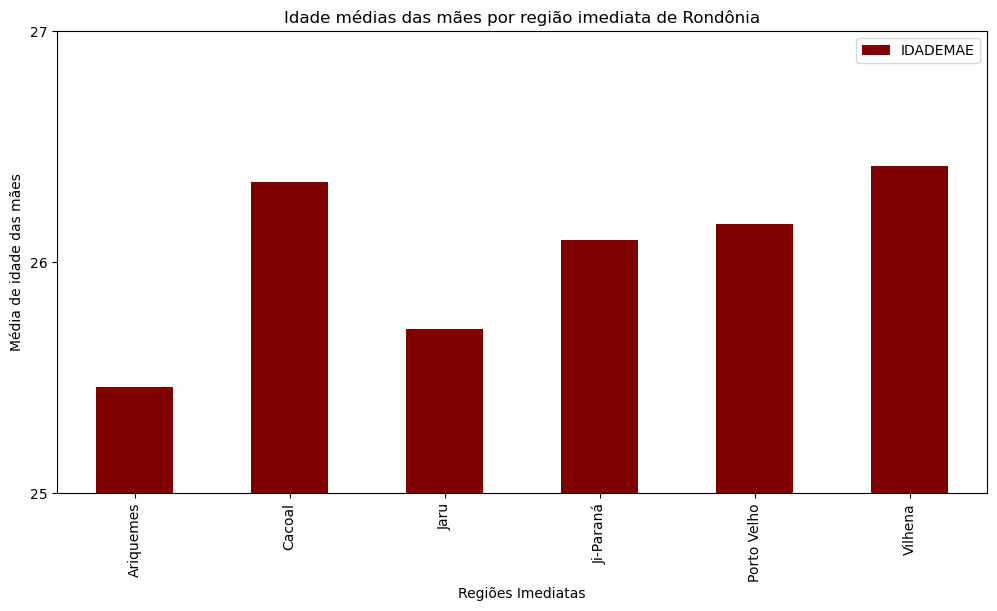

In [71]:
ax2 = result2.plot.bar(figsize=[12,6], color = "maroon") # plotando a média de idade das mães por região imediata

plt.title('Idade médias das mães por região imediata de Rondônia')
plt.ylabel('Média de idade das mães');
plt.xlabel('Regiões Imediatas');

ax2.set_ylim([25, 27]);
ax2.set_yticks((25,26,27));

In [88]:
result2 = sinasc4.groupby([reg_imediata]).median()

C:\Users\khrik\AppData\Local\Temp\ipykernel_13940\748062496.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result2 = sinasc4.groupby([reg_imediata]).median()


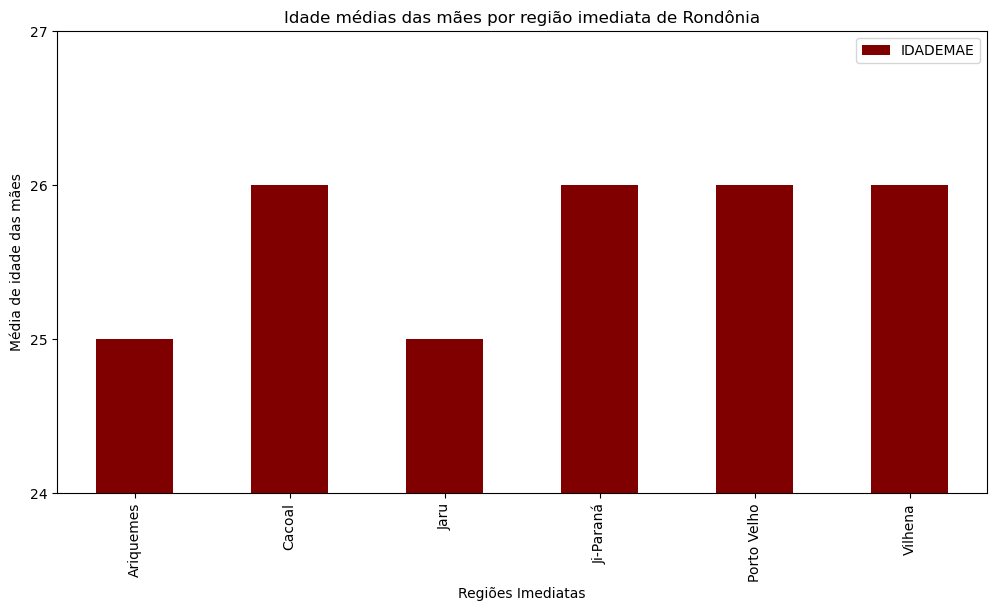

In [92]:
ax3 = result2.plot.bar(figsize=[12,6], color = "maroon") # plotando a média de idade das mães por região imediata

plt.title('Idade médias das mães por região imediata de Rondônia')
plt.ylabel('Média de idade das mães');
plt.xlabel('Regiões Imediatas');

ax3.set_ylim([24, 27]);
ax3.set_yticks((24,25,26,27));

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [76]:
dados_ro = pd.read_csv('dados_extras_ro.csv', sep=';', encoding='latin_1')

In [27]:
dados_ro.head()

,municipio,regiao,idh,ifdm,pib
0,Alta Floresta D'Oeste,Cacoal,0.641,0.6337,496000
1,Alto Alegre dos Parecis,Cacoal,0.592,0.5046,213410
2,Alto Paraíso,Ariquemes,0.625,0.5735,358000
3,Alvorada D'Oeste,Ji-Paraná,0.643,0.5919,204098
4,Ariquemes,Ariquemes,0.702,0.7746,2579830


In [54]:
dados_ro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   municipio  52 non-null     object 
 1   regiao     52 non-null     object 
 2   idh        52 non-null     float64
 3   ifdm       52 non-null     float64
 4   pib        52 non-null     int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 2.2+ KB


In [ ]:
dados_ro = dados_ro.set_index.

In [23]:
idhcut = pd.cut(dados_ro['idh'], [0.583,0.600,0.699,0.750])

In [77]:
dados_ro.groupby(idhcut)[['municipio']].sum()

,municipio
idh,
"(0.583, 0.6]",Alto Alegre dos ParecisCampo Novo de RondôniaG...
"(0.6, 0.699]",Alta Floresta D'OesteAlto ParaísoAlvorada D'Oe...
"(0.699, 0.75]",AriquemesCacoalJi-ParanáPimenta BuenoPorto Vel...


In [86]:
dados_ro.groupby('regiao')['idh'].mean()

regiao
Ariquemes      0.630500
Cacoal         0.655929
Jaru           0.610800
Ji-Paraná      0.636769
Porto Velho    0.648600
Vilhena        0.669714
Name: idh, dtype: float64

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [45]:
ifdmcut = pd.cut(dados_ro['ifdm'],[0.4560,0.5999,0.777])

In [49]:
dados_ro.groupby(ifdmcut)['municipio'].sum().to_frame()

,municipio
ifdm,
"(0.456, 0.6]",Alto Alegre dos ParecisAlto ParaísoAlvorada D'...
"(0.6, 0.777]",Alta Floresta D'OesteAriquemesBuritisCacoalCan...


In [87]:
dados_ro.groupby('regiao')['ifdm'].mean()

regiao
Ariquemes      0.602175
Cacoal         0.616614
Jaru           0.548980
Ji-Paraná      0.610092
Porto Velho    0.599680
Vilhena        0.642686
Name: ifdm, dtype: float64

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [55]:
pibcut = pd.cut(dados_ro['pib'],[52000,100000,200000,300000,500000,900000,18000000])

In [73]:
dados_ro.groupby(pibcut)[['municipio','regiao']].sum()

,municipio,regiao
pib,,
"(52000, 100000]",CastanheirasNova UniãoParecisPimenteiras do Oe...,CacoalJi-ParanáCacoalVilhenaCacoalAriquemesCac...
"(100000, 200000]",CabixiCacaulândiaChupinguaiaCorumbiaraCosta Ma...,VilhenaAriquemesVilhenaVilhenaJi-ParanáJaruPor...
"(200000, 300000]",Alto Alegre dos ParecisAlvorada D'OesteCampo N...,CacoalJi-ParanáAriquemesAriquemes
"(300000, 500000]",Alta Floresta D'OesteAlto ParaísoColorado do O...,CacoalAriquemesVilhenaAriquemesCacoalJi-Paraná...
"(500000, 900000]",BuritisCandeias do JamariCerejeirasEspigão D'O...,AriquemesPorto VelhoVilhenaCacoalPorto VelhoJa...
"(900000, 18000000]",AriquemesCacoalJaruJi-ParanáPimenta BuenoPorto...,AriquemesCacoalJaruJi-ParanáCacoalPorto VelhoC...


In [96]:
dados_ro.pivot_table(values = 'pib',
                     index = 'regiao',
                     margins = True,
                     margins_name = 'Total',
                     aggfunc = 'sum')

,pib
regiao,
Ariquemes,4670292
Cacoal,7109861
Jaru,2527726
Ji-Paraná,7177652
Porto Velho,20011421
Vilhena,4241511
Total,45738463


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

## Insights

1- Geralmente, cidades ao entorno da capital, tendem a ter diversos índices mais altos. As cidade vizinhas a Porto Velho não seguem esta tendência no que diz respeito ao PIB. Há uma distribuição relativamente equlibrada do PIB nas regiões imediatas de Rondônia.

2- A média de idade das mães na região imediata de Vilhena (26.48) é superior a de todas as demais regiões. Ainda que a região tenha o segundo menor PIB (4.241.511), tem o maior IDH e IFDM, o que pode apontar para uma política de acesso à informação das mães e planejamento da maternidade.

3- O oposto é possível de ser observado. Jaru, a região com o menor PIB, IFDM e IDH, possui a segunda menor média de idade. No entanto. Isto não aponta para uma política menos efetiva, pois a idade média de todas as regiões imediatas varia de 24 à 26 anos de idade. Existem casos discrepantes de crianças de 12 anos sendo registradas como mães, o que já é um fato criminoso. No entanto, o caso é único e o que configura é uma idade mínima de 17 anos para as mães.

4- O Porto Velho, região imediata com o maior PIB (20.011.421), apresenta um indicador superior à três estados Brasileiros, Amapá, ACre e Roraima.
